In [1]:
## Pytorch
import pandas as pd

from sklearn import model_selection, datasets, metrics
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = datasets.load_breast_cancer()

print(data.keys())
print(data.target.shape)


In [3]:
data.frame

In [ ]:
#Описание датасета
print(data.DESCR)

In [ ]:
# создайте DataFrame из data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Добавьте столбец "target" и заполните его данными.
df['target'] = data.target
# Посмотрим первые пять строк
df.head()

In [ ]:
#проверить данные на пропуски и корректность
df.info()

In [7]:
#Подготовка датасета
X = data.data
y = data.target
# разделим данные с помощью Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

In [9]:
from sklearn.metrics import accuracy_score

def measure_quality(predictions):
    return accuracy_score(y_test, predictions)

In [40]:
model = nn.Sequential(
    nn.Linear(30, 64),
    nn.ReLU(),
    nn.Linear(64,2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_values = []
accuracy_values = []

num_epochs = 40

Epoch [1/40], Loss: 1.0898, Accuracy: 0.3772
Epoch [2/40], Loss: 2.5676, Accuracy: 0.4035
Epoch [3/40], Loss: 1.3370, Accuracy: 0.8509
Epoch [4/40], Loss: 0.6932, Accuracy: 0.7281
Epoch [5/40], Loss: 1.4513, Accuracy: 0.7632
Epoch [6/40], Loss: 1.2989, Accuracy: 0.8596
Epoch [7/40], Loss: 0.6882, Accuracy: 0.7807
Epoch [8/40], Loss: 0.5841, Accuracy: 0.5789
Epoch [9/40], Loss: 0.9686, Accuracy: 0.5789
Epoch [10/40], Loss: 0.9773, Accuracy: 0.7456
Epoch [11/40], Loss: 0.6204, Accuracy: 0.8596
Epoch [12/40], Loss: 0.4600, Accuracy: 0.8684
Epoch [13/40], Loss: 0.6197, Accuracy: 0.8421
Epoch [14/40], Loss: 0.7443, Accuracy: 0.8772
Epoch [15/40], Loss: 0.6373, Accuracy: 0.8860
Epoch [16/40], Loss: 0.4351, Accuracy: 0.8684
Epoch [17/40], Loss: 0.3904, Accuracy: 0.7982
Epoch [18/40], Loss: 0.5092, Accuracy: 0.7895
Epoch [19/40], Loss: 0.5488, Accuracy: 0.8509
Epoch [20/40], Loss: 0.4289, Accuracy: 0.9123
Epoch [21/40], Loss: 0.3271, Accuracy: 0.9035
Epoch [22/40], Loss: 0.3575, Accuracy: 0.88

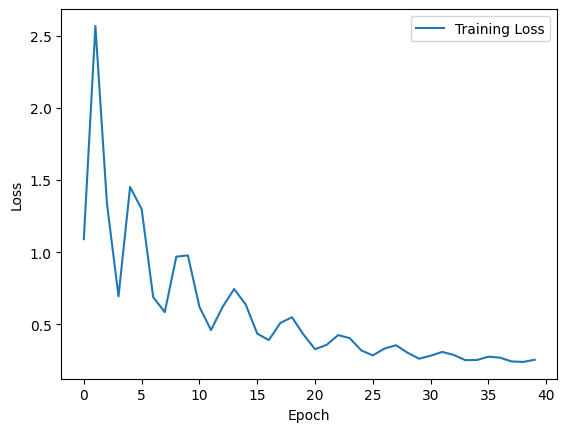

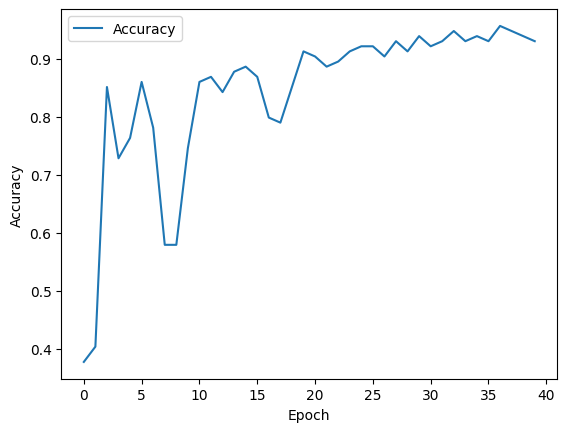

In [41]:
for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.long)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    # Accuracy
    inputs_test = torch.tensor(X_test, dtype=torch.float32)
    labels_test = torch.tensor(y_test, dtype=torch.long)
    outputs_test = model(inputs_test)
    _, predicted = torch.max(outputs_test, 1)
    accuracy = measure_quality(predicted)
    accuracy_values.append(accuracy.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

# Графики Loss и Accuracy
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# Инференс
with torch.no_grad():
    inputs = torch.tensor(X_test[1], dtype=torch.float32)
    output = model(inputs)
    predicted = torch.argmax(output).item()

print("Predicted class:", predicted)
print("True class:", y_test[1])

Predicted class: 0
True class: 0
